In [ ]:
pip install quandl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'PASTE YOUR API KEY HERE'
selected = ['GOOGL', 'AMZN', 'AAPL', 'FB', 'MSFT']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)
data.head()

,date,ticker,adj_close
None,,,
0,2016-12-30,MSFT,60.788710
1,2016-12-29,MSFT,61.532183
2,2016-12-28,MSFT,61.620226
3,2016-12-27,MSFT,61.903920
4,2016-12-23,MSFT,61.864790


In [ ]:
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()

adj_close                                       
ticker           AAPL    AMZN      FB       GOOGL       MSFT
date                                                        
2014-01-02  73.523423  397.97  54.710  558.283367  33.532800
2014-01-03  71.908415  396.44  54.557  554.210796  33.307202
2014-01-06  72.300536  393.63  57.200  560.389870  32.603338
2014-01-07  71.783135  398.03  57.920  571.193219  32.856007
2014-01-08  72.238063  401.92  58.230  572.381888  32.269454

In [ ]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 100000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]
df.head()

,Returns,Volatility,GOOGL Weight,AMZN Weight,AAPL Weight,FB Weight,MSFT Weight
0,0.213778,0.203800,0.249351,0.131284,0.284648,0.270863,0.063855
1,0.231336,0.202853,0.136865,0.215695,0.217335,0.105009,0.325096
2,0.244751,0.238763,0.018062,0.436725,0.287737,0.167183,0.090293
3,0.200358,0.198130,0.114362,0.126702,0.119013,0.381510,0.258412
4,0.212197,0.193008,0.265918,0.108055,0.194951,0.196543,0.234532


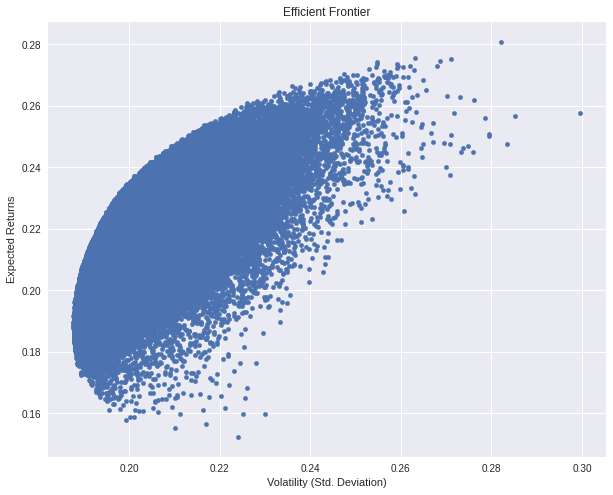

In [ ]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()